Cross-selling Or Upselling recommendations for banking products for XYZ Client By ABC CLient.

Topics:

Cross-selling products

Group name: One Group

Member: Safawat Al Naser

Email: snaser@alliant.edu

Country: USA

College: Alliant International University

Specialization: Data Analyst


Problem Statement: 

In this project, our client is a Latin American credit union company XYZ. They are having issues in cross-selling banking products such as credit cards, savings accounts, retirement accounts, and safe deposit boxes. It can take a significant amount of research and business knowledge to increase cross-selling. In order to succeed in the cross-selling area of the business, Data Analyst at ABC analytics is searching for the best technique to be recommended.

Business Understanding: The goal of ABC analytics company is to perform Exploratory data analysis on the data provided by the client and gain some meaningful insights. As a Data analyst intern, my job was to perform EDA on the credit union’s dataset and create visualizations to analyze the data and to provide recommendations to the company to increase effective cross-selling of banking products.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.show()

In [2]:
df_r=pd.read_csv('Train.csv')

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_7497/3834398932.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_r=pd.read_csv('Train.csv')


##Data Cleaning

In [3]:
df_r.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


#As the column Name are not EXplicitly Understandable We need to Change it.

In [4]:

New_col_Nm = {'fecha_dato' : 'Date',
       'ncodpers' : 'Customer_Code',
       'ind_empleado' : 'Employee_Index',
       'pais_residencia' : 'Country',
       'sexo' : 'Gender',
       'age' : 'Age',
       'fecha_alta' : 'Customer_Join_Date',
       'ind_nuevo' : 'Customer_Index',
       'antiguedad' : 'Customer_Seniority',
       'indrel' : 'Primary_Customer',
       'ult_fec_cli_1t' : 'Customer_Leave_Date',
       'indrel_1mes' : 'Customer_Type',
       'tiprel_1mes' : 'Customer_Relation',
       'indresi' : 'Residence_Index',
       'indext' : 'Foriegner_Index',
       'conyuemp' : 'Spouse_Index',
       'canal_entrada' : 'Channel_Used',
       'indfall' : 'Deceased_Index',
       'tipodom' : 'Primary_Address',
       'cod_prov' : 'Customer_Address',
       'nomprov' : 'Province',
       'ind_actividad_cliente' : 'Activity_Index',
       'renta' : 'Gross_Income',
       'segmento' : 'Segmentation',
       'ind_ahor_fin_ult1' : 'Saving_Account',
        'ind_aval_fin_ult1' : 'Guarantees',
        'ind_cco_fin_ult1' : 'Current_Accounts',
        'ind_cder_fin_ult1' : 'Derivative_Account',
        'ind_cno_fin_ult1' : 'Payroll_Account',
        'ind_ctju_fin_ult1' : 'Junior_Account',
        'ind_ctma_fin_ult1' : 'More_Private_Account',
        'ind_ctop_fin_ult1' : 'Private_Account',
        'ind_ctpp_fin_ult1' : 'Private_Plus_Account',
        'ind_deco_fin_ult1' : 'Short_Term_Deposits',
        'ind_deme_fin_ult1' : 'Medium_Term_Deposits',
        'ind_dela_fin_ult1' : 'Long_Term_Deposits',
        'ind_ecue_fin_ult1' : 'E_Account',
        'ind_fond_fin_ult1' : 'Funds',
        'ind_hip_fin_ult1' : 'Mortgage',
        'ind_plan_fin_ult1' : 'Pensions',
        'ind_pres_fin_ult1' : 'Loans',
        'ind_reca_fin_ult1' : 'Taxes',
        'ind_tjcr_fin_ult1' : 'Credit_Card',
        'ind_valo_fin_ult1' : 'Securities',
        'ind_viv_fin_ult1' : 'Home_Account',
        'ind_nomina_ult1' : 'Payroll',
        'ind_nom_pens_ult1' : 'Pensions2',
        'ind_recibo_ult1' : 'Direct_Debit'
       }
df_r = df_r.rename(columns = New_col_Nm)

Columns Renamed

In [5]:
df_r.shape

(13647309, 48)

In [6]:
#More then 13 million observations and 48 columns

In [7]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Customer_Code         int64  
 2   Employee_Index        object 
 3   Country               object 
 4   Gender                object 
 5   Age                   object 
 6   Customer_Join_Date    object 
 7   Customer_Index        float64
 8   Customer_Seniority    object 
 9   Primary_Customer      float64
 10  Customer_Leave_Date   object 
 11  Customer_Type         object 
 12  Customer_Relation     object 
 13  Residence_Index       object 
 14  Foriegner_Index       object 
 15  Spouse_Index          object 
 16  Channel_Used          object 
 17  Deceased_Index        object 
 18  Primary_Address       float64
 19  Customer_Address      float64
 20  Province              object 
 21  Activity_Index        float64
 22  Gross_Income          float64
 23  Segme

In [8]:
#we can see that dates are in the object type catagory we need to change it to date type.

In [9]:

df_r['Date'] = pd.to_datetime(df_r['Date'])


In [10]:
df_r['Customer_Join_Date'] = pd.to_datetime(df_r['Customer_Join_Date'])


In [11]:
df_r['Customer_Leave_Date'] = pd.to_datetime(df_r['Customer_Leave_Date'])

In [12]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Customer_Code         int64         
 2   Employee_Index        object        
 3   Country               object        
 4   Gender                object        
 5   Age                   object        
 6   Customer_Join_Date    datetime64[ns]
 7   Customer_Index        float64       
 8   Customer_Seniority    object        
 9   Primary_Customer      float64       
 10  Customer_Leave_Date   datetime64[ns]
 11  Customer_Type         object        
 12  Customer_Relation     object        
 13  Residence_Index       object        
 14  Foriegner_Index       object        
 15  Spouse_Index          object        
 16  Channel_Used          object        
 17  Deceased_Index        object        
 18  Primary_Address       float64       
 19

In [13]:
df=df_r.copy()

Data types chaged to datetime 

#Percentage of null Values the null Values

In [14]:
print(df.isnull().sum()/len(df)*100)

Date                     0.000000
Customer_Code            0.000000
Employee_Index           0.203220
Country                  0.203220
Gender                   0.203732
Age                      0.000000
Customer_Join_Date       0.203220
Customer_Index           0.203220
Customer_Seniority       0.000000
Primary_Customer         0.203220
Customer_Leave_Date     99.818330
Customer_Type            1.097513
Customer_Relation        1.097513
Residence_Index          0.203220
Foriegner_Index          0.203220
Spouse_Index            99.986752
Channel_Used             1.363829
Deceased_Index           0.203220
Primary_Address          0.203227
Customer_Address         0.685784
Province                 0.685784
Activity_Index           0.203220
Gross_Income            20.475648
Segmentation             1.387585
Saving_Account           0.000000
Guarantees               0.000000
Current_Accounts         0.000000
Derivative_Account       0.000000
Payroll_Account          0.000000
Junior_Account

#some of the columns have 99% null values which we can remove.
#It is useful to work with the colums which have less than 20% null values.

In [15]:

df.drop(['Customer_Leave_Date','Spouse_Index'],axis=1,inplace=True)


In [16]:
#droping Null Values
#droping Duplicates to keep one date per customer.
df.drop_duplicates(subset='Customer_Code')

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13632377,2016-05-28,1185013,N,ES,V,53,2016-05-14,1.0,0,1.0,P,R,S,N,NaN,N,1.0,23.0,JAEN,1.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13641337,2016-05-28,1168909,N,ES,V,43,2013-08-23,1.0,0,1.0,3.0,P,S,N,NaN,N,1.0,36.0,PONTEVEDRA,1.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13642462,2016-05-28,1173729,N,ES,H,33,2013-09-09,1.0,1,1.0,1,A,S,S,NaN,N,1.0,14.0,CORDOBA,1.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13645025,2016-05-28,1164094,N,ES,H,54,2016-05-13,0.0,32,1.0,2,A,S,N,KFC,N,1.0,30.0,MURCIA,1.0,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [17]:
df.isnull().sum()/len(df)*100

Date                     0.000000
Customer_Code            0.000000
Employee_Index           0.203220
Country                  0.203220
Gender                   0.203732
Age                      0.000000
Customer_Join_Date       0.203220
Customer_Index           0.203220
Customer_Seniority       0.000000
Primary_Customer         0.203220
Customer_Type            1.097513
Customer_Relation        1.097513
Residence_Index          0.203220
Foriegner_Index          0.203220
Channel_Used             1.363829
Deceased_Index           0.203220
Primary_Address          0.203227
Customer_Address         0.685784
Province                 0.685784
Activity_Index           0.203220
Gross_Income            20.475648
Segmentation             1.387585
Saving_Account           0.000000
Guarantees               0.000000
Current_Accounts         0.000000
Derivative_Account       0.000000
Payroll_Account          0.000000
Junior_Account           0.000000
More_Private_Account     0.000000
Private_Accoun

In [18]:
##Employee_Index,Country,Gender has less than .3% null values we can drop the null values.

In [19]:

df.dropna(subset=['Employee_Index','Country','Gender'],inplace=True)


In [20]:
#a small potion a of data from the Payroll,Pensions2,Primary_Address are null values 
#i will Drop this values.

In [21]:

df.dropna(subset=['Payroll','Pensions2','Primary_Address'],inplace=True)



In [22]:
print(df['Gross_Income'].mean())

134253.6463392701


In [23]:
#Fill the gross income null Values by mean values.

In [24]:

df['Gross_Income'].fillna(value=df['Gross_Income'].mean(),inplace=True)


In [25]:
df.Customer_Type.value_counts(dropna=False)

1.0    7277376
1.0    4017737
1      2195311
NaN     122047
3.0       1804
3.0       1380
3         1137
P          873
2          483
2.0        479
2.0        354
4.0        143
4.0         93
4           70
Name: Customer_Type, dtype: int64

In [26]:
df = df.dropna(subset = ['Customer_Type'])

In [27]:
df = df.astype(object).replace({'Customer_Type':{1.0:'Primary Customer', 1: 'Primary Customer', 2.0: 'Co-Owner', 2: 'Co-Owner', 3.0: 'Former Primary Customer', 3: 'Former Primary Customer', 4.0: 'Former Co-Owner', 4: 'Former Co-Owner', 'P': 'Potential Customer'}})


In [28]:
print(df['Customer_Type'].value_counts())

Primary Customer           7277376
1.0                        4017737
1                          2195311
3.0                           1804
Former Primary Customer       1380
3                             1137
Potential Customer             873
2                              483
2.0                            479
Co-Owner                       354
4.0                            143
Former Co-Owner                 93
4                               70
Name: Customer_Type, dtype: int64


In [29]:
df.dropna(subset=['Customer_Address','Province','Channel_Used','Segmentation'],inplace=True)


In [30]:
##looking for outliers.##looking for outliers.

In [31]:

print(df.Employee_Index.value_counts())


N    13382661
B        3537
F        2512
A        2475
S          17
Name: Employee_Index, dtype: int64


In [32]:
for column in ["Employee_Index", "Country", "Gender"]:
    df[column] = df[column].astype('category')

In [33]:
##replacing some column valus to Make it more understandable.

In [34]:

df = df.replace({'Gender':{'H':'M', 'V': 'F'}})

In [35]:
df = df.replace({'Customer_Relation':{'I': 'Inactive', 'A': 'Active', 'P': 'Former Customer', 'R': 'Potential'}})

In [36]:
df = df.replace({'Customer_Index':{0.0: 'Old_Customer', 1.0: 'New_Customer'}})

In [37]:
print(df['Activity_Index'].value_counts(dropna = False))


0.0    7237908
1.0    6153294
Name: Activity_Index, dtype: int64


In [38]:
df = df.replace({'Activity_Index':{0.0: 'Inactive Customer', 1.0: 'Active Customer'}})

In [39]:
df.head(5)

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
0,2015-01-28 00:00:00,1375586,N,ES,M,35,2015-01-12 00:00:00,Old_Customer,6,1.0,Primary Customer,Active,S,N,KHL,N,1.0,29.0,MALAGA,Active Customer,87218.1,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28 00:00:00,1050611,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35,1.0,Primary Customer,Inactive,S,S,KHE,N,1.0,13.0,CIUDAD REAL,Inactive Customer,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28 00:00:00,1050612,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35,1.0,Primary Customer,Inactive,S,N,KHE,N,1.0,13.0,CIUDAD REAL,Inactive Customer,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28 00:00:00,1050613,N,ES,M,22,2012-08-10 00:00:00,Old_Customer,35,1.0,Primary Customer,Inactive,S,N,KHD,N,1.0,50.0,ZARAGOZA,Inactive Customer,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28 00:00:00,1050614,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35,1.0,Primary Customer,Active,S,N,KHE,N,1.0,50.0,ZARAGOZA,Active Customer,134253.646339,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [40]:
print(df['Residence_Index'].value_counts(dropna = False))

S    13391117
N          85
Name: Residence_Index, dtype: int64


In [41]:

df = df.replace({'Residence_Index':{"S": 'Yes', "N": 'No'}})




In [42]:
df = df.replace({'Foriegner_Index':{"S": 'Yes', "N": 'No'}})

In [43]:
df = df.replace({'Deceased_Index':{"S": 'Yes', "N": 'No'}})

In [44]:
#change some data types to integer types

In [45]:

for col in ['Age','Customer_Seniority','Gross_Income']:
      df[col]=df[col].astype('int')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13391202 entries, 0 to 13647307
Data columns (total 46 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Date                  object  
 1   Customer_Code         object  
 2   Employee_Index        category
 3   Country               category
 4   Gender                category
 5   Age                   int64   
 6   Customer_Join_Date    object  
 7   Customer_Index        object  
 8   Customer_Seniority    int64   
 9   Primary_Customer      object  
 10  Customer_Type         object  
 11  Customer_Relation     object  
 12  Residence_Index       object  
 13  Foriegner_Index       object  
 14  Channel_Used          object  
 15  Deceased_Index        object  
 16  Primary_Address       object  
 17  Customer_Address      object  
 18  Province              object  
 19  Activity_Index        object  
 20  Gross_Income          int64   
 21  Segmentation          object  
 22  Saving_Account  


For the easiness of analysis some works have done like:
1.	Rename the columns.
2.	Changed the data types as required.
3.	Changed column values so that in can be easily understandable


#EDA ANALYSIS

In [47]:
df = df.astype({'Customer_Code': 'int64',
                'Employee_Index': 'object',
               'Country': 'object',
               'Gender': 'object',
               'Age': 'int64',
               'Customer_Index': 'object',
               'Customer_Seniority': 'float64',
               'Primary_Customer': 'float64',
               'Customer_Type': 'object',
               'Customer_Relation': 'object',
               'Residence_Index': 'object',
               'Foriegner_Index': 'object',
               'Channel_Used': 'object',
               'Deceased_Index': 'object',
               'Primary_Address': 'float64',
               'Customer_Address': 'float64',
               'Province': 'object',
               'Activity_Index': 'object',
               'Gross_Income': 'float64',
               'Segmentation': 'object',
               'Saving_Account': 'int64',
               'Guarantees': 'int64',
               'Current_Accounts': 'int64',
               'Derivative_Account': 'int64',
               'Payroll_Account': 'int64',
               'Junior_Account': 'int64',
               'More_Private_Account': 'int64',
               'Private_Account': 'int64',
               'Private_Plus_Account': 'int64',
               'Short_Term_Deposits': 'int64',
               'Medium_Term_Deposits': 'int64',
               'Long_Term_Deposits': 'int64',
               'E_Account': 'int64',
               'Funds': 'int64',
               'Mortgage': 'int64',
               'Pensions': 'int64',
               'Loans': 'int64',
               'Taxes': 'int64',
               'Credit_Card': 'int64',
               'Securities': 'int64',
               'Home_Account': 'int64',
               'Payroll': 'float64',
               'Pensions2': 'float64',
               'Direct_Debit': 'int64'})

In [48]:
corre=df.corr()

<AxesSubplot:>

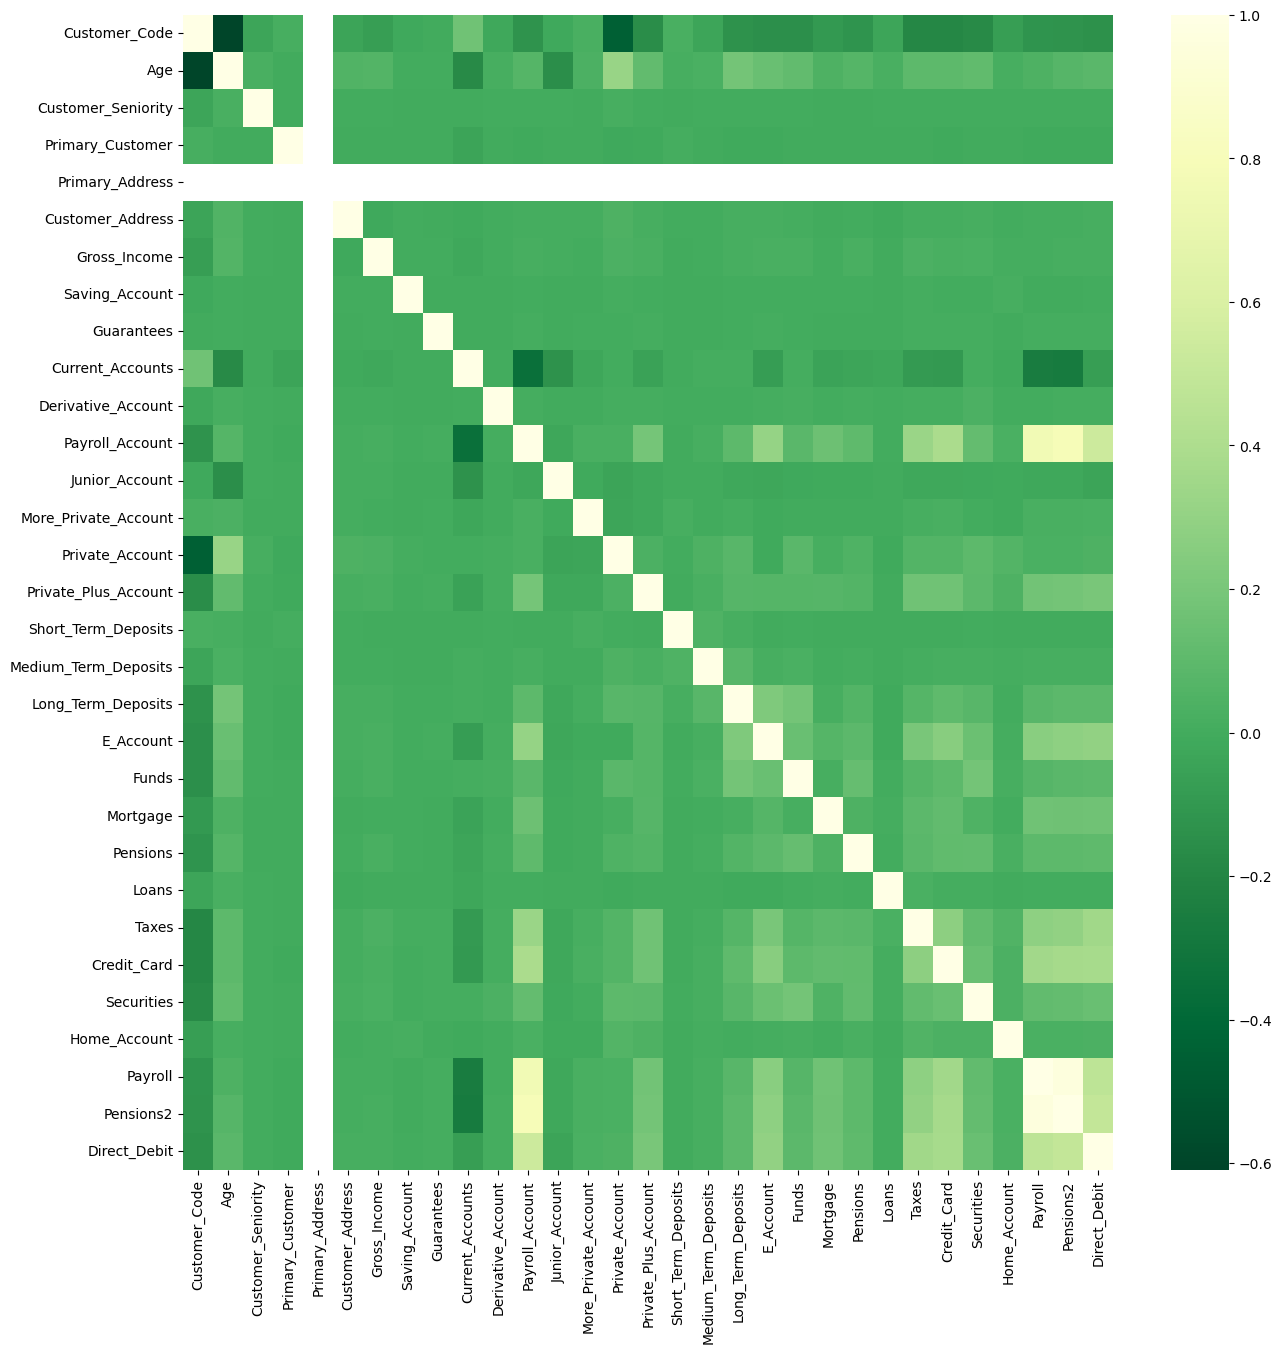

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(corre,cmap='YlGn_r')

In [50]:
#strong correlation between Payroll and Payroll acoount also pansion2 and payroll account.

In [51]:
df.head(5)

,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
0,2015-01-28 00:00:00,1375586,N,ES,M,35,2015-01-12 00:00:00,Old_Customer,6.0,1.0,Primary Customer,Active,Yes,No,KHL,No,1.0,29.0,MALAGA,Active Customer,87218.0,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28 00:00:00,1050611,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Inactive,Yes,Yes,KHE,No,1.0,13.0,CIUDAD REAL,Inactive Customer,35548.0,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28 00:00:00,1050612,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Inactive,Yes,No,KHE,No,1.0,13.0,CIUDAD REAL,Inactive Customer,122179.0,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28 00:00:00,1050613,N,ES,M,22,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Inactive,Yes,No,KHD,No,1.0,50.0,ZARAGOZA,Inactive Customer,119775.0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28 00:00:00,1050614,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,134253.0,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [52]:
customer_i = df['Customer_Index'].value_counts()
customer_i

Old_Customer    12716812
New_Customer      674390
Name: Customer_Index, dtype: int64

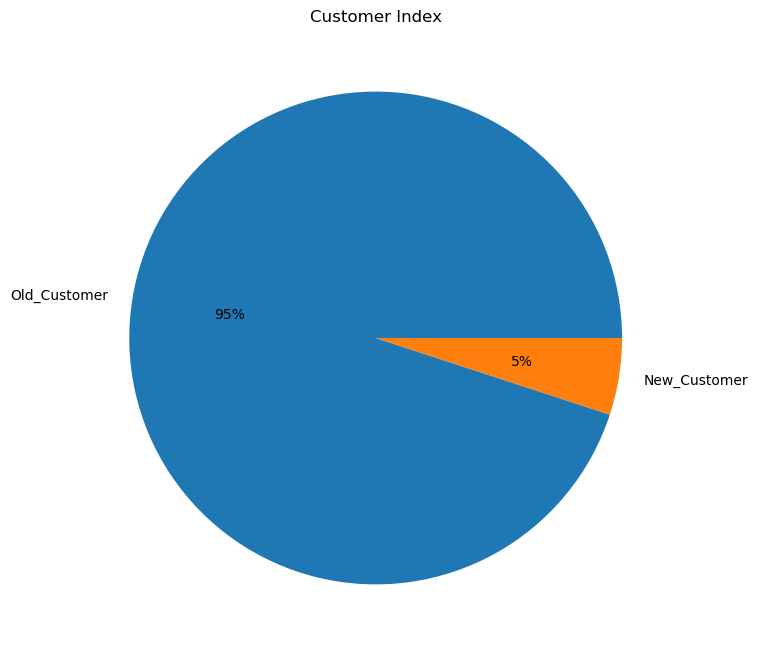

In [53]:
customer_i.plot.pie(y = customer_i.index, figsize=(8,8), title = 'Customer Index', label = '', autopct='%.0f%%')
plt.show() 


In [54]:
#percentage of new customers is very Low.

<AxesSubplot:>

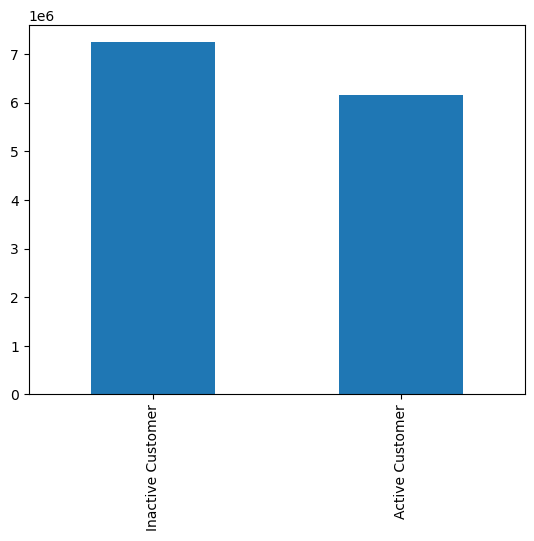

In [55]:
df.Activity_Index.value_counts().plot(kind='bar')

In [56]:
#number of inactive customer is more

In [57]:
#Change the values of the features to make it more understandable

In [58]:

df = df.replace({'Saving_Account':{0: 'No', 1: 'Yes'}})




In [59]:
df = df.replace({'Guarantees':{0: 'No', 1: 'Yes'}})

In [60]:
df = df.replace({'Current_Accounts':{0: 'No', 1: 'Yes'}})



In [61]:
df = df.replace({'Payroll_Account':{0: 'No', 1: 'Yes'}})

In [62]:
df = df.replace({'Junior_Account':{0: 'No', 1: 'Yes'}})



In [63]:
df = df.replace({'More_Private_Account':{0: 'No', 1: 'Yes'}})

In [64]:
df.to_csv("df.csv")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.show()

In [2]:
df=pd.read_csv('df.csv')

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_8667/3671688458.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('df.csv')


In [4]:
df = df.replace({'Private_Plus_Account':{0: 'No', 1: 'Yes'}})



In [5]:
df = df.replace({'Short_Term_Deposits':{0: 'No', 1: 'Yes'}})

In [6]:
df = df.replace({'Medium_Term_Deposits':{0: 'No', 1: 'Yes'}})



In [7]:
df = df.replace({'Long_Term_Deposits':{0: 'No', 1: 'Yes'}})

In [8]:
df = df.replace({'E_Account':{0: 'No', 1: 'Yes'}})


In [9]:
df = df.replace({'Funds':{0: 'No', 1: 'Yes'}})

In [10]:
df = df.replace({'Mortgage':{0: 'No', 1: 'Yes'}})



In [11]:
df = df.replace({'Loans':{0: 'No', 1: 'Yes'}})

In [12]:
df = df.replace({'Taxes':{0: 'No', 1: 'Yes'}})



In [13]:
df = df.replace({'Credit_Card':{0: 'No', 1: 'Yes'}})

In [14]:
df = df.replace({'Securities':{0: 'No', 1: 'Yes'}})



In [15]:
df = df.replace({'Home_Account':{0: 'No', 1: 'Yes'}})

In [16]:
df = df.replace({'Payroll':{0: 'No', 1: 'Yes'}})


In [17]:
df = df.replace({'Direct_Debit':{0: 'No', 1: 'Yes'}})

In [18]:

df = df.replace({'Pensions':{0: 'No', 1: 'Yes'}})



In [19]:
df = df.replace({'Pensions2':{0: 'No', 1: 'Yes'}})

In [20]:
df = df.replace({'Derivative_Account':{0: 'No', 1: 'Yes'}})

In [21]:
df.to_csv('modified_df.csv')

In [22]:
df.head(5)

,Unnamed: 0,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
0,0,2015-01-28 00:00:00,1375586,N,ES,M,35,2015-01-12 00:00:00,Old_Customer,6.0,1.0,Primary Customer,Active,Yes,No,KHL,No,1.0,29.0,MALAGA,Active Customer,87218.0,02 - PARTICULARES,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,1,2015-01-28 00:00:00,1050611,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Inactive,Yes,Yes,KHE,No,1.0,13.0,CIUDAD REAL,Inactive Customer,35548.0,03 - UNIVERSITARIO,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,2,2015-01-28 00:00:00,1050612,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Inactive,Yes,No,KHE,No,1.0,13.0,CIUDAD REAL,Inactive Customer,122179.0,03 - UNIVERSITARIO,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,3,2015-01-28 00:00:00,1050613,N,ES,M,22,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Inactive,Yes,No,KHD,No,1.0,50.0,ZARAGOZA,Inactive Customer,119775.0,03 - UNIVERSITARIO,No,No,No,No,No,No,No,0,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,4,2015-01-28 00:00:00,1050614,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,134253.0,03 - UNIVERSITARIO,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [23]:
df1 = df[['Saving_Account', 'Guarantees', 'Current_Accounts', 'Derivative_Account', 'Payroll_Account', 'Junior_Account',
                'More_Private_Account', 'Private_Plus_Account', 'Short_Term_Deposits', 'Medium_Term_Deposits',
                'Long_Term_Deposits', 'E_Account', 'Funds', 'Mortgage', 'Loans', 'Taxes','Credit_Card', 'Securities','Home_Account', 
                'Payroll', 'Direct_Debit', 'Pensions', 'Pensions2']]

In [24]:
df1.to_csv('Banking_Products.csv')

In [25]:
#dropping inactive customers

In [26]:

df = df.drop(df[df.Activity_Index == 'Inactive Customer'].index)

In [27]:
df.shape

(6153294, 47)

In [28]:
df_accounts = df[['Saving_Account', 'Guarantees', 'Current_Accounts', 'Derivative_Account', 'Payroll_Account',
                  'Junior_Account', 'More_Private_Account', 'Private_Account', 'Private_Plus_Account', 'Short_Term_Deposits',
                 'Medium_Term_Deposits', 'Long_Term_Deposits', 'E_Account', 'Funds','Mortgage', 'Pensions', 'Loans', 'Taxes',
                 'Credit_Card', 'Securities', 'Home_Account', 'Payroll', 'Pensions2', 'Direct_Debit']]

In [29]:
#checking number of accounts

df_accounts['Sum'] = 0

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_8667/2756679169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts['Sum'] = 0


In [30]:
df_accounts['Sum'] = (df_accounts[['Saving_Account','Guarantees', 'Current_Accounts','Derivative_Account', 'Payroll_Account',
                  'Junior_Account', 'More_Private_Account', 'Private_Account', 'Private_Plus_Account', 'Short_Term_Deposits',
                 'Medium_Term_Deposits', 'Long_Term_Deposits', 'E_Account', 'Funds','Mortgage', 'Pensions', 'Loans', 'Taxes',
                 'Credit_Card', 'Securities', 'Home_Account', 'Payroll', 'Pensions2', 'Direct_Debit']] == 'Yes').sum(axis=1)

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_8667/980118090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts['Sum'] = (df_accounts[['Saving_Account','Guarantees', 'Current_Accounts','Derivative_Account', 'Payroll_Account',


In [31]:
df_accounts.head(5)

,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit,Sum
0,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
4,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
7,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
12,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
13,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1


In [32]:
df_accounts.shape


(6153294, 25)

In [33]:
print(df_accounts['Sum'].value_counts(dropna = False))


1     2965807
2     1370333
3      622874
4      392114
5      265612
6      196053
7      126431
0      110774
8       64619
9       26465
10       8764
11       2832
12        512
13         95
14          9
Name: Sum, dtype: int64


In [34]:
df_accounts.drop(df_accounts[df_accounts.Sum == 0].index, inplace=True)

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_8667/2498976616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts.drop(df_accounts[df_accounts.Sum == 0].index, inplace=True)


In [35]:
print(df_accounts['Sum'].value_counts(dropna = False))

1     2965807
2     1370333
3      622874
4      392114
5      265612
6      196053
7      126431
8       64619
9       26465
10       8764
11       2832
12        512
13         95
14          9
Name: Sum, dtype: int64


In [36]:
df_accounts['Multiple_Accounts'] = 0

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_8667/4281272442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts['Multiple_Accounts'] = 0


In [37]:
df_accounts['Multiple_Accounts'] = ['Multiple Accounts' if x > 1 else 'Single Account' for x in (df_accounts['Sum'])]


/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_8667/248013668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts['Multiple_Accounts'] = ['Multiple Accounts' if x > 1 else 'Single Account' for x in (df_accounts['Sum'])]


In [38]:
df_accounts_plt= df_accounts['Multiple_Accounts'].value_counts(dropna = False)
df_accounts_plt


Multiple Accounts    3076713
Single Account       2965807
Name: Multiple_Accounts, dtype: int64

In [39]:
df_accounts_plt.to_csv('Multiple Accounts.csv')

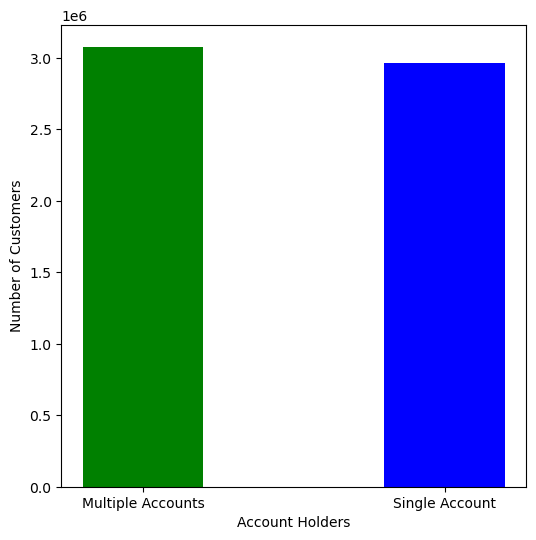

In [40]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(df_accounts_plt.index, df_accounts_plt.values, width=0.4, color = ['Green', 'Blue'])
plt.ylabel('Number of Customers')
plt.xlabel('Account Holders')
axes.legend
plt.show()

In [41]:
#There are 168464 customers with single account. There are more number of customer holding multiple accounts than with single accounts.

In [42]:
#AGE GROUP plot

In [43]:

age_plt = df['Age'].value_counts()
age_plt

23     217652
21     215623
22     211015
24     201186
44     189073
        ...  
111        54
115        37
116        28
114         7
117         3
Name: Age, Length: 116, dtype: int64

In [44]:
age_plt.to_csv('Number of active customers by age.csv')

Text(0, 0.5, 'Number of Customer')

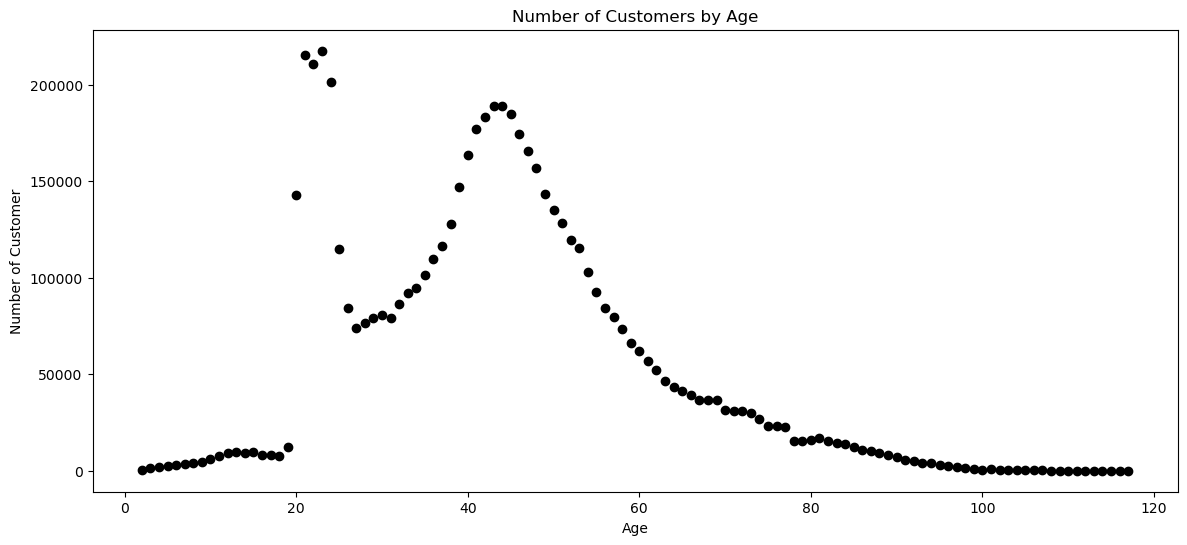

In [45]:
fig, axes = plt.subplots(figsize = (14,6))
plt.scatter(age_plt.index, age_plt.values, color = 'Black')
axes.set_title("Number of Customers by Age")
plt.xlabel("Age")
plt.ylabel("Number of Customer")

In [46]:
#The most number of customers are from the Adult age group (Age: 20-55)

#getting number of accounts the Adult age group hold

In [47]:


array = np.arange(20,55)
df_age = df.loc[df['Age'].isin(array)]
df_age.head()
df_age.to_csv('df_age.csv')

In [48]:
df_age['Sum'] = df_accounts['Sum']

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_8667/1830201022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Sum'] = df_accounts['Sum']


In [49]:
df_age['Multiple_Accounts'] = df_accounts['Multiple_Accounts']

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_8667/3504570831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Multiple_Accounts'] = df_accounts['Multiple_Accounts']


In [50]:
df_age.shape

(4780890, 49)

In [51]:
df_age.head()

,Unnamed: 0,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit,Sum,Multiple_Accounts
0,0,2015-01-28 00:00:00,1375586,N,ES,M,35,2015-01-12 00:00:00,Old_Customer,6.0,1.0,Primary Customer,Active,Yes,No,KHL,No,1.0,29.0,MALAGA,Active Customer,87218.0,02 - PARTICULARES,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.0,Single Account
4,4,2015-01-28 00:00:00,1050614,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,134253.0,03 - UNIVERSITARIO,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.0,Single Account
7,7,2015-01-28 00:00:00,1050617,N,ES,M,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,113316.0,03 - UNIVERSITARIO,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.0,Single Account
12,12,2015-01-28 00:00:00,1050623,N,ES,M,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,49.0,ZAMORA,Active Customer,113538.0,03 - UNIVERSITARIO,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.0,Single Account
14,14,2015-01-28 00:00:00,1050625,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,49.0,ZAMORA,Active Customer,134253.0,03 - UNIVERSITARIO,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.0,Single Account


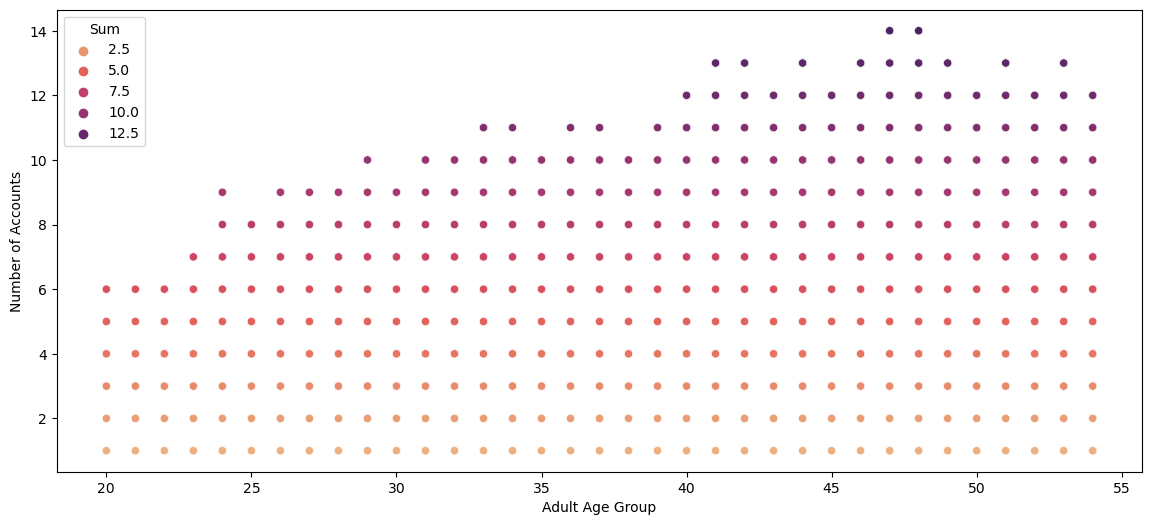

In [52]:
fig, axes = plt.subplots(figsize = (14,6))
sns.scatterplot(x = df_age['Age'], y = df_age['Sum'], hue = df_accounts['Sum'], palette = "flare")
plt.ylabel('Number of Accounts')
plt.xlabel('Adult Age Group')
plt.legend
plt.show()

In [54]:
df1=pd.read_csv('Banking_Products.csv')

In [55]:
df1

,Unnamed: 0,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Direct_Debit,Pensions,Pensions2
0,0,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,1,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,2,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,3,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,4,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13391197,13391197,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
13391198,13391198,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
13391199,13391199,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
13391200,13391200,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [56]:
df_accounts = df1[['Saving_Account', 'Guarantees', 'Current_Accounts', 'Derivative_Account', 'Payroll_Account',
                  'Junior_Account', 'More_Private_Account','Private_Plus_Account', 'Short_Term_Deposits',
                 'Medium_Term_Deposits', 'Long_Term_Deposits', 'E_Account', 'Funds','Mortgage', 'Pensions', 'Loans', 'Taxes',
                 'Credit_Card', 'Securities', 'Home_Account', 'Payroll', 'Pensions2', 'Direct_Debit']]


In [57]:
df_accounts

,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
0,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13391197,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
13391198,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
13391199,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
13391200,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [58]:
Saving_Account = df1['Saving_Account'].value_counts(dropna = False)
Saving_Account

No     13389806
Yes        1396
Name: Saving_Account, dtype: int64

In [59]:
Saving_Account.to_csv('Saving_Account.csv')

In [60]:
Guarantees = df1['Guarantees'].value_counts(dropna = False)
Guarantees
Guarantees.to_csv('Guarantees.csv')

In [61]:
Current_Accounts = df1['Current_Accounts'].value_counts(dropna = False)
Current_Accounts.to_csv('Current_Accounts.csv')

In [62]:
Derivative_Account = df1['Derivative_Account'].value_counts(dropna = False)
Derivative_Account.to_csv('Derivative_Account.csv')

In [63]:
Payroll_Account = df1['Payroll_Account'].value_counts(dropna = False)
Payroll_Account.to_csv('Payroll_Account.csv')

In [64]:
Junior_Account = df1['Junior_Account'].value_counts(dropna = False)
Junior_Account.to_csv('Junior_Account.csv')

In [65]:
More_Private_Account = df1['More_Private_Account'].value_counts(dropna = False)
More_Private_Account.to_csv('More_Private_Account.csv')

In [66]:
Private_Plus_Account = df1['Private_Plus_Account'].value_counts(dropna = False)
Private_Plus_Account.to_csv('Private_Plus_Account.csv')

In [67]:
Short_Term_Deposits = df1['Short_Term_Deposits'].value_counts(dropna = False)
Short_Term_Deposits.to_csv('Short_Term_Deposits.csv')

In [68]:
Medium_Term_Deposits = df1['Medium_Term_Deposits'].value_counts(dropna = False)
Medium_Term_Deposits.to_csv('Medium_Term_Deposits.csv')

In [69]:
Long_Term_Deposits = df1['Long_Term_Deposits'].value_counts(dropna = False)
Long_Term_Deposits.to_csv('Long_Term_Deposits.csv')

In [72]:
E_Account = df1['E_Account'].value_counts(dropna = False)
E_Account.to_csv('E_Account.csv')

In [73]:
Funds = df1['Funds'].value_counts(dropna = False)
Funds.to_csv('Funds.csv')

In [74]:
Mortgage = df1['Mortgage'].value_counts(dropna = False)
Mortgage.to_csv('Mortgage.csv')

In [75]:
Pensions = df1['Pensions'].value_counts(dropna = False)
Pensions.to_csv('Pensions.csv')

In [76]:
Loans = df1['Loans'].value_counts(dropna = False)
Loans.to_csv('Loans.csv')

In [77]:
Taxes = df1['Taxes'].value_counts(dropna = False)
Taxes.to_csv('Taxes.csv')

In [78]:
Credit_Card = df1['Credit_Card'].value_counts(dropna = False)
Credit_Card.to_csv('Credit_Card.csv')

In [79]:
Securities = df1['Securities'].value_counts(dropna = False)
Securities.to_csv('Securities.csv')

In [80]:
Home_Account = df1['Home_Account'].value_counts(dropna = False)
Home_Account.to_csv('Home_Account.csv')

In [81]:
Payroll = df1['Payroll'].value_counts(dropna = False)
Payroll.to_csv('Payroll.csv')

In [82]:
Pensions2 = df1['Pensions2'].value_counts(dropna = False)
Pensions2.to_csv('Pensions2.csv')

In [83]:
Direct_Debit = df1['Direct_Debit'].value_counts(dropna = False)
Direct_Debit.to_csv('Direct_Debit.csv')

In [84]:
df2 = pd.concat([Saving_Account, Guarantees, Current_Accounts, Derivative_Account, Payroll_Account, Junior_Account,
                More_Private_Account, Private_Plus_Account, Short_Term_Deposits, Medium_Term_Deposits,
                Long_Term_Deposits, E_Account, Funds, Mortgage, Loans, Taxes, Credit_Card, Securities, Home_Account, 
                Payroll, Direct_Debit, Pensions, Pensions2], axis = 1)

df2

In [85]:
df2

,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Direct_Debit,Pensions,Pensions2
No,13389806,13390903,4579492,13385849,12289965,13262649,13261461,12802643,13368179,13368878,12808004,12267505,13141289,13311272,13356749,12686453,12787992,13046401,13338786,12646390,11652004,13266887,12582457
Yes,1396,299,8811710,5353,1101237,128553,129741,588559,23023,22324,583198,1123697,249913,79930,34453,704749,603210,344801,52416,744812,1739198,124315,808745


In [86]:
df2 = df2.transpose()

In [87]:

df2= df2.reset_index()
df2 

,index,No,Yes
0,Saving_Account,13389806,1396
1,Guarantees,13390903,299
2,Current_Accounts,4579492,8811710
3,Derivative_Account,13385849,5353
4,Payroll_Account,12289965,1101237
5,Junior_Account,13262649,128553
6,More_Private_Account,13261461,129741
7,Private_Plus_Account,12802643,588559
8,Short_Term_Deposits,13368179,23023
9,Medium_Term_Deposits,13368878,22324


In [88]:
df2 = df2.sort_values(by='Yes', ascending = False)
df2

,index,No,Yes
2,Current_Accounts,4579492,8811710
20,Direct_Debit,11652004,1739198
11,E_Account,12267505,1123697
4,Payroll_Account,12289965,1101237
22,Pensions2,12582457,808745
19,Payroll,12646390,744812
15,Taxes,12686453,704749
16,Credit_Card,12787992,603210
7,Private_Plus_Account,12802643,588559
10,Long_Term_Deposits,12808004,583198


In [89]:
df2.rename(columns={'index': 'Types of Accounts', 'Yes': 'Number of Customers with Accounts'}, inplace=True)

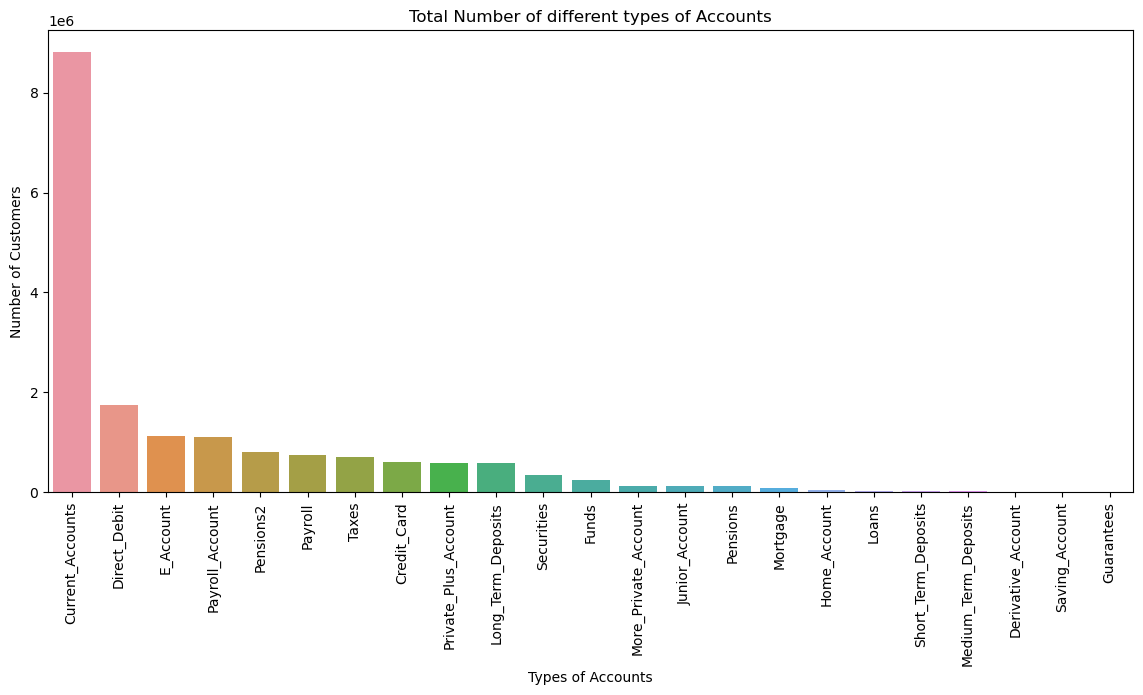

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(figsize = (14,6))

sns.barplot(x = df2['Types of Accounts'], y = df2['Number of Customers with Accounts'])
plt.ylabel('Number of Customers')
plt.xlabel('Types of Accounts')
plt.xticks(rotation = 90)
axes.set_title('Total Number of different types of Accounts')
plt.show()


In [95]:
#The highest number of accounts sold are Current Accounts, Direct Debit, and Private Account; while the lowest sold accounts are Medium Term Deposits, Short Term Deposits, Derivative accounts, Savings Account and Guarantees

In [96]:
#df5=pd.read_csv('Train.csv')
#df5.head(5)
gender = df['Gender'].value_counts(dropna = False)
gender

F    3527245
M    2626049
Name: Gender, dtype: int64

In [97]:
#df.Gender.value_counts()

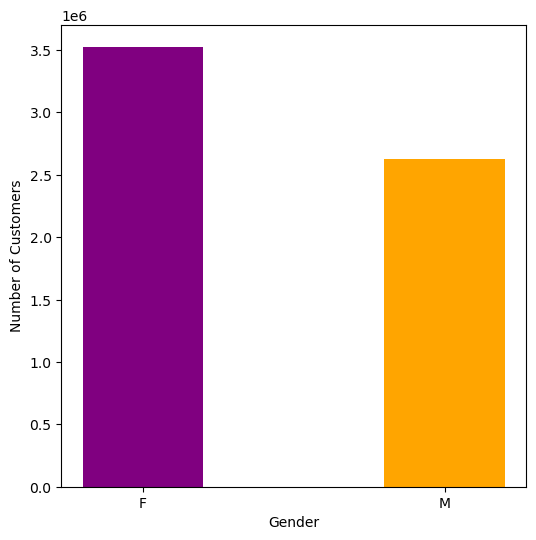

In [98]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(gender.index, gender.values, width=0.4, color = ['Purple', 'Orange'])
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
axes.legend
plt.show()

There are more female customers than male customers in XYZ Credit Union

In [99]:
#Average Gross Income

average_income = df["Gross_Income"].mean()
print(average_income)

139848.49813628278


In [100]:
df['Average_Income_Test'] = 0
df['Average_Income_Test'] = ['Above Average Income' if x >= average_income else 'Below Average Income' for x in (df['Gross_Income'])]
df.head()

,Unnamed: 0,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit,Average_Income_Test
0,0,2015-01-28 00:00:00,1375586,N,ES,M,35,2015-01-12 00:00:00,Old_Customer,6.0,1.0,Primary Customer,Active,Yes,No,KHL,No,1.0,29.0,MALAGA,Active Customer,87218.0,02 - PARTICULARES,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
4,4,2015-01-28 00:00:00,1050614,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,134253.0,03 - UNIVERSITARIO,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
7,7,2015-01-28 00:00:00,1050617,N,ES,M,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,113316.0,03 - UNIVERSITARIO,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
12,12,2015-01-28 00:00:00,1050623,N,ES,M,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,49.0,ZAMORA,Active Customer,113538.0,03 - UNIVERSITARIO,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
13,13,2015-01-28 00:00:00,1050624,N,ES,M,65,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,61605.0,02 - PARTICULARES,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income


In [101]:
df = df.replace({'Segmentation':{'01 - TOP': 'VIP', '02 - PARTICULARES': 'Individuals', '03 - UNIVERSITARIO': 'College Graduate'}})

In [103]:
df

,Unnamed: 0,Date,Customer_Code,Employee_Index,Country,Gender,Age,Customer_Join_Date,Customer_Index,Customer_Seniority,Primary_Customer,Customer_Type,Customer_Relation,Residence_Index,Foriegner_Index,Channel_Used,Deceased_Index,Primary_Address,Customer_Address,Province,Activity_Index,Gross_Income,Segmentation,Saving_Account,Guarantees,Current_Accounts,Derivative_Account,Payroll_Account,Junior_Account,More_Private_Account,Private_Account,Private_Plus_Account,Short_Term_Deposits,Medium_Term_Deposits,Long_Term_Deposits,E_Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit,Average_Income_Test
0,0,2015-01-28 00:00:00,1375586,N,ES,M,35,2015-01-12 00:00:00,Old_Customer,6.0,1.0,Primary Customer,Active,Yes,No,KHL,No,1.0,29.0,MALAGA,Active Customer,87218.0,Individuals,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
4,4,2015-01-28 00:00:00,1050614,N,ES,F,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,134253.0,College Graduate,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
7,7,2015-01-28 00:00:00,1050617,N,ES,M,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,113316.0,College Graduate,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
12,12,2015-01-28 00:00:00,1050623,N,ES,M,23,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,49.0,ZAMORA,Active Customer,113538.0,College Graduate,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
13,13,2015-01-28 00:00:00,1050624,N,ES,M,65,2012-08-10 00:00:00,Old_Customer,35.0,1.0,Primary Customer,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,61605.0,Individuals,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13391174,13647280,2016-05-28 00:00:00,1166761,N,ES,M,23,2013-08-14 00:00:00,Old_Customer,33.0,1.0,1.0,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,134253.0,College Graduate,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
13391184,13647290,2016-05-28 00:00:00,1166779,N,ES,F,23,2013-08-14 00:00:00,Old_Customer,33.0,1.0,1.0,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,57302.0,College Graduate,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
13391185,13647291,2016-05-28 00:00:00,1166778,N,ES,F,23,2013-08-14 00:00:00,Old_Customer,33.0,1.0,1.0,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,134253.0,College Graduate,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income
13391188,13647294,2016-05-28 00:00:00,1166775,N,ES,F,23,2013-08-16 00:00:00,Old_Customer,33.0,1.0,1.0,Active,Yes,No,KHE,No,1.0,50.0,ZARAGOZA,Active Customer,77784.0,College Graduate,No,No,Yes,No,No,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Below Average Income


In [104]:
segmentation = df['Segmentation'].value_counts(dropna = False)
segmentation

Individuals         4129800
College Graduate    1473895
VIP                  549599
Name: Segmentation, dtype: int64

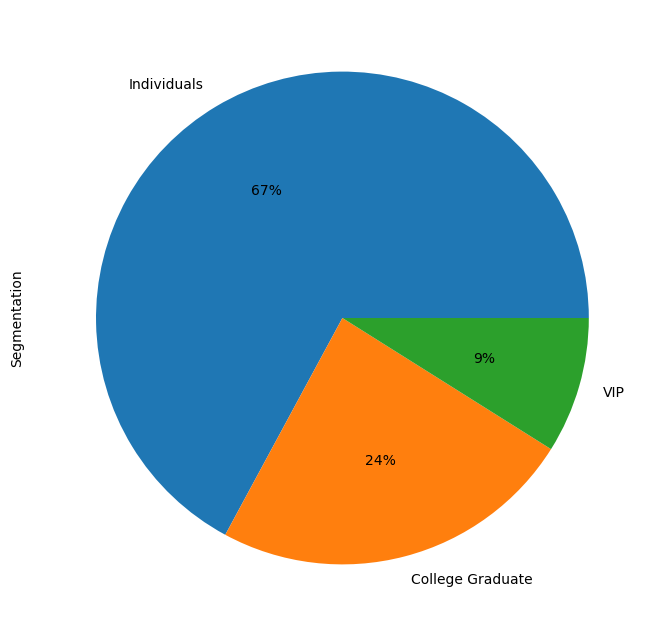

In [105]:
segmentation.plot.pie(y = segmentation.index, figsize=(8,8), autopct='%.0f%%')
plt.show()

In [106]:
#Two-third customers of XYZ Credit Union are individuals.

In [107]:
income = df['Average_Income_Test'].value_counts()
income

Below Average Income    4424882
Above Average Income    1728412
Name: Average_Income_Test, dtype: int64

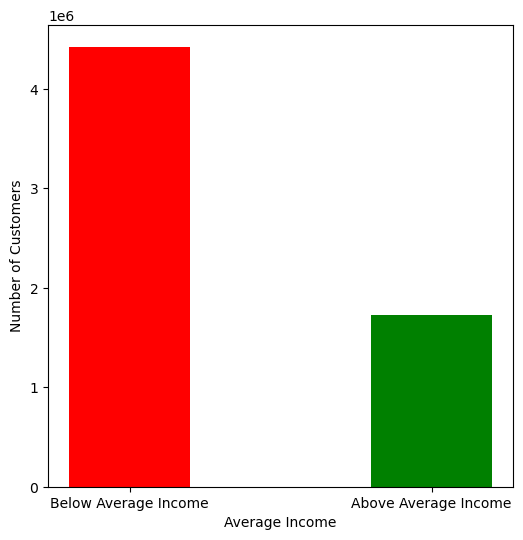

In [108]:
fig, axes = plt.subplots(figsize = (6,6))
axes.bar(income.index, income.values, width=0.4, color = ['Red', 'Green'])
plt.ylabel('Number of Customers')
plt.xlabel('Average Income')
axes.legend
plt.show()

In [109]:
#top 10 channels

channel = df['Channel_Used'].value_counts()
channel = channel.sort_values(ascending = False)
channel = channel[:10]
channel

KAT    1887134
KFC    1733479
KHE    1021650
KFA     255274
KHQ     182645
KHK     153530
KHM     122698
KHN      87660
RED      63723
KAS      46456
Name: Channel_Used, dtype: int64

In [110]:
channel.to_csv('Channels.csv')


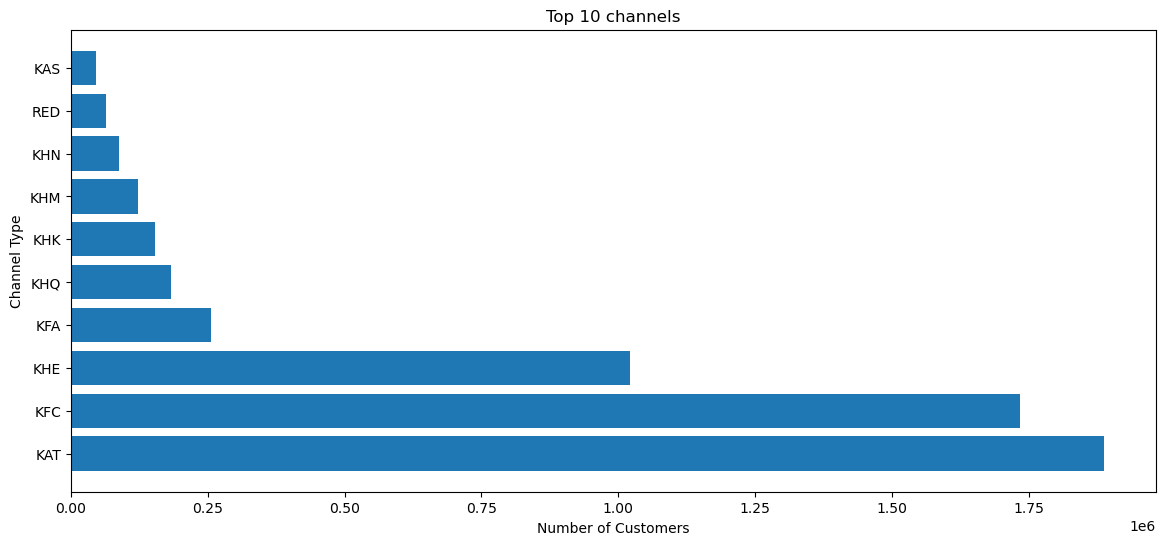

In [111]:
fig, axes = plt.subplots(figsize = (14,6))
axes.barh(channel.index, channel.values)
plt.ylabel('Channel Type')
plt.xlabel('Number of Customers')
axes.set_title('Top 10 channels')
axes.legend
plt.show()

Over a million customers have joined XYZ Credit Union from top 10 Channels presented here.

EDA INSIGHT

1. more number of Inactive Customers than Active Customer.

2. Some accounts are sold together such as Payroll is highly related to Pensions2 and Payroll Account is correlated with Pensions2, Payroll, Debit and Credit Card.

3. Among the adult group XYZ Credit Unions is most popular


4. The highest number of accounts sold are Current Accounts, Direct Debit, and Private Account
5. the lowest sold accounts are Medium Term Deposits, Short Term Deposits, Derivative accounts, Savings Account and Guarantees.

6. There are more female customers than male customers in XYZ Credit Union.


7. Customers with below average income are more than the customers with above average income.


8. Top 10 chanels are contributing most in the XYZ Business.

Recommendations for cross-selling of banking products

I. Introducing loyalty programs such as health insurance or rewards for engaging with the account may increase the use of accounts that have been inactive for a while (dormant accounts).

II. To attract more male members they can intuduce some programs such as cash back for gas price, male brand endorsement, discount on their product when buying stuffs.

III. Colaboration with govt sector to increase the brand loyality.

IV. Reach out people through social network such as facebook,tiktok youtube.

V. Reach out more channel so that people can reach them easily.